# Análise de Artrite em Frangos de Abate

Este notebook analisa a prevalência de artrite em frangos de abate utilizando dados de um banco SQLite. Vamos explorar a relação entre a porcentagem de artrite e variáveis como linhagem, idade da matriz, fornecedor, e outros fatores.

In [2]:
# Importando bibliotecas necessárias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurando estilo dos gráficos
# plt.style.use('seaborn')  # Seaborn styles are applied automatically
%matplotlib inline

In [3]:
# Conectando ao banco de dados
conn = sqlite3.connect('../database/resultado_lotes.db')

# Carregando dados da view vw_condena_resultados
query = 'SELECT * FROM vw_condena_resultados'
df = pd.read_sql_query(query, conn)

# Fechando a conexão
conn.close()

# Visualizando as primeiras linhas
df.head()

,Data_Abate,Data_Alojamento,Lote_Composto,Aviario,Nucleo,Fornecedor,Placa,Aves,Peso_Medio,Artrite_pct,Proprietário,Linhagem,Idade_Matriz,Matriz,Fornecedor_Pintainho,Classificacao,Conversao,Mortalidade,ANO
0,2025-01-02,2024-11-16,939-61,939,63,C.Vale,SEP1C01,3266,3.474,0.52,FERNANDO PIVETTA,ROSS AP,33.0,11/24,Pato Branco,4,1.750,5.978261,2025
1,2025-01-02,2024-11-16,939-61,939,63,C.Vale,SEP1C01,3266,3.474,0.43,FERNANDO PIVETTA,ROSS AP,33.0,11/24,Pato Branco,4,1.750,5.978261,2025
2,2025-01-02,2024-11-16,1277-14,1277,392,C.Vale,RHY9D27,3232,3.364,0.25,SERGIO LUIS SPESSOTTO,ROSS AP,45.0,10824,Plusval,4,1.732,8.058824,2025
3,2025-01-02,2024-11-19,1035-45,1035,30,C.Vale,BCP2E00,3227,3.151,0.12,JOSE ANTONIO TONDO,ROSS AP,59.0,10424,Plusval,2,1.708,3.676923,2025
4,2025-01-02,2024-11-19,160-169,160,30,C.Vale,BEK1A48,3771,3.135,0.08,JOSE ANTONIO TONDO,ROSS AP,54.0,10424,Plusval,4,1.713,3.543590,2025


## Limpeza e Preparação dos Dados

Vamos verificar a presença de valores nulos e realizar uma limpeza inicial dos dados.

In [4]:
# Verificando valores nulos
print('Valores nulos por coluna:')
print(df.isnull().sum())

# Convertendo tipos de dados, se necessário
df['Idade_Matriz'] = df['Idade_Matriz'].astype(float)
df['Artrite_pct'] = df['Artrite_pct'].astype(float)
df['Peso_Medio'] = df['Peso_Medio'].astype(float)
df['Conversao'] = df['Conversao'].astype(float)

# Estatísticas descritivas
df.describe()

Valores nulos por coluna:
Data_Abate               0
Data_Alojamento          0
Lote_Composto            0
Aviario                  0
Nucleo                  12
Fornecedor               0
Placa                    0
Aves                     0
Peso_Medio               0
Artrite_pct              0
Proprietário             0
Linhagem                 0
Idade_Matriz             0
Matriz                   0
Fornecedor_Pintainho     0
Classificacao            0
Conversao                0
Mortalidade              0
ANO                      0
dtype: int64


,Aves,Peso_Medio,Artrite_pct,Idade_Matriz,Classificacao,Conversao,Mortalidade,ANO
count,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.0
mean,3552.581977,3.362414,0.360994,41.594609,2.545276,1.720907,6.701830,2025.0
std,374.773243,0.241468,0.301191,10.249785,1.284587,0.089344,3.438024,0.0
min,437.000000,0.000000,0.000000,-13.000000,0.000000,1.352000,0.640845,2025.0
25%,3235.000000,3.213000,0.160000,34.000000,2.000000,1.665000,4.577778,2025.0
50%,3771.000000,3.380000,0.290000,40.000000,2.000000,1.711000,6.000000,2025.0
75%,3775.000000,3.531000,0.480000,50.000000,4.000000,1.765000,8.020000,2025.0
max,4374.000000,4.566000,5.590000,74.000000,5.000000,3.295000,74.038462,2025.0


## Análise Exploratória

### 1. Distribuição da Porcentagem de Artrite

Vamos analisar a distribuição da artrite nos lotes.

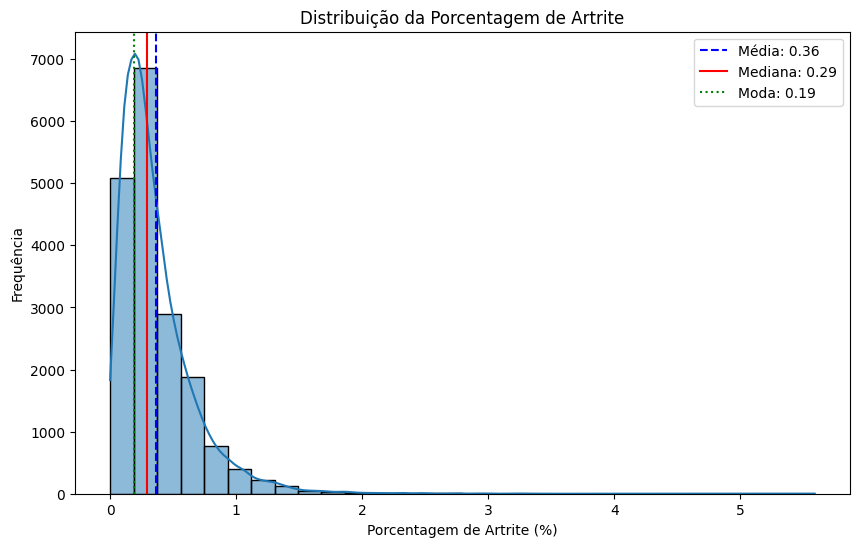

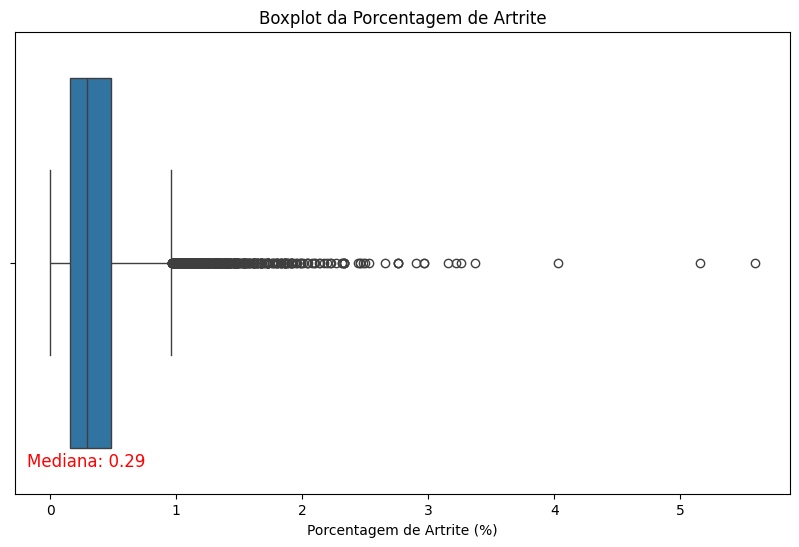

In [5]:
# Histograma da porcentagem de artrite
plt.figure(figsize=(10, 6))
sns.histplot(df['Artrite_pct'], bins=30, kde=True)
plt.title('Distribuição da Porcentagem de Artrite')
plt.xlabel('Porcentagem de Artrite (%)')
plt.ylabel('Frequência')

# Adicionando linha da média e mediana
media = df['Artrite_pct'].mean()
mediana = df['Artrite_pct'].median()
plt.axvline(media, color='blue', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(mediana, color='red', linestyle='-', label=f'Mediana: {mediana:.2f}')

# Adicionando linha da moda (aproximação)
moda = df['Artrite_pct'].mode()[0]
plt.axvline(moda, color='green', linestyle=':', label=f'Moda: {moda:.2f}')

plt.legend()
plt.show()

# Boxplot da porcentagem de artrite
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df['Artrite_pct'])
plt.title('Boxplot da Porcentagem de Artrite')
plt.xlabel('Porcentagem de Artrite (%)')

# Calcular o segundo quartil (mediana)
q2 = df['Artrite_pct'].median()

# Adicionar rótulo no segundo quartil
plt.text(q2, 0.05, f'Mediana: {q2:.2f}', color='red', fontsize=12, ha='center', va='bottom', transform=ax.get_xaxis_transform())

plt.show()

### 2. Artrite por Linhagem

Analisando como a artrite varia entre as linhagens (ROSS AP e COBB MALE).

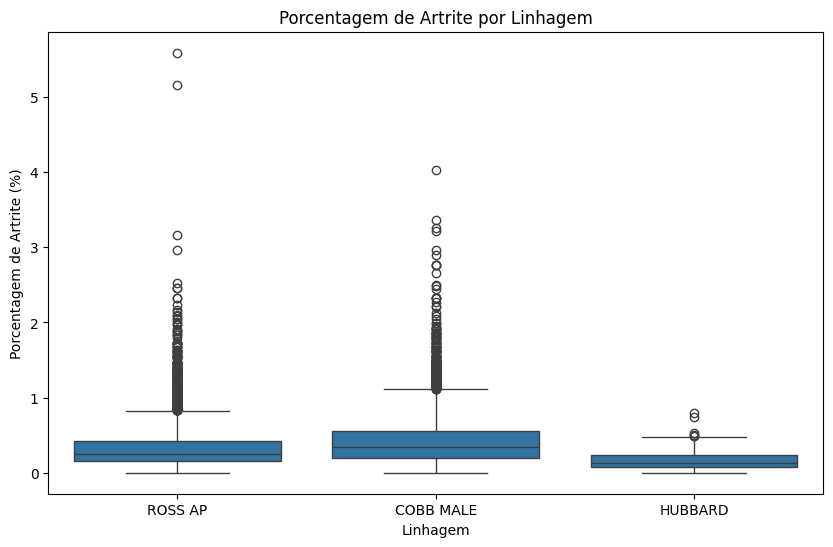

Média de artrite por linhagem:
Linhagem
COBB MALE    0.417496
HUBBARD      0.180131
ROSS AP      0.324470
Name: Artrite_pct, dtype: float64


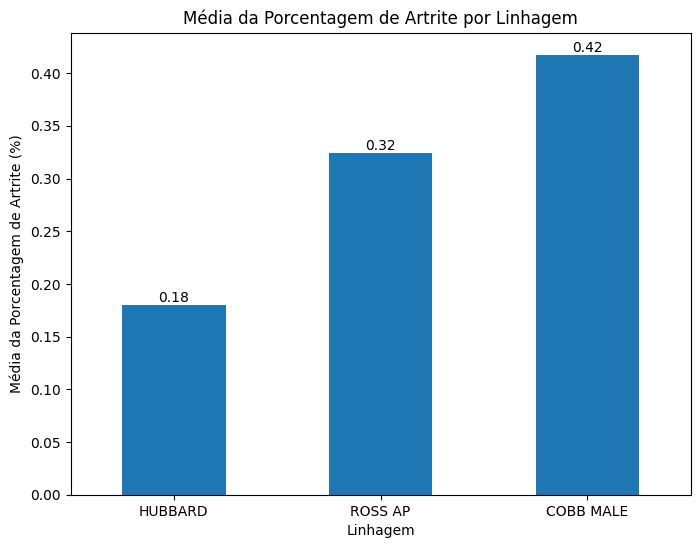

In [6]:
# Boxplot de artrite por linhagem
plt.figure(figsize=(10, 6))
sns.boxplot(x='Linhagem', y='Artrite_pct', data=df)
plt.title('Porcentagem de Artrite por Linhagem')
plt.xlabel('Linhagem')
plt.ylabel('Porcentagem de Artrite (%)')
plt.show()

# Média de artrite por linhagem
print('Média de artrite por linhagem:')
print(df.groupby('Linhagem')['Artrite_pct'].mean())

# Gráfico de barras da média de artrite por linhagem
mean_artrite_linhagem = df.groupby('Linhagem')['Artrite_pct'].mean()
plt.figure(figsize=(8, 6))
ax = mean_artrite_linhagem.sort_values().plot(kind='bar')
plt.title('Média da Porcentagem de Artrite por Linhagem')
plt.xlabel('Linhagem')
plt.ylabel('Média da Porcentagem de Artrite (%)')
plt.xticks(rotation=0)

# Adicionando rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### 3. Relação com Idade da Matriz

Verificando se a idade da matriz influencia a prevalência de artrite.

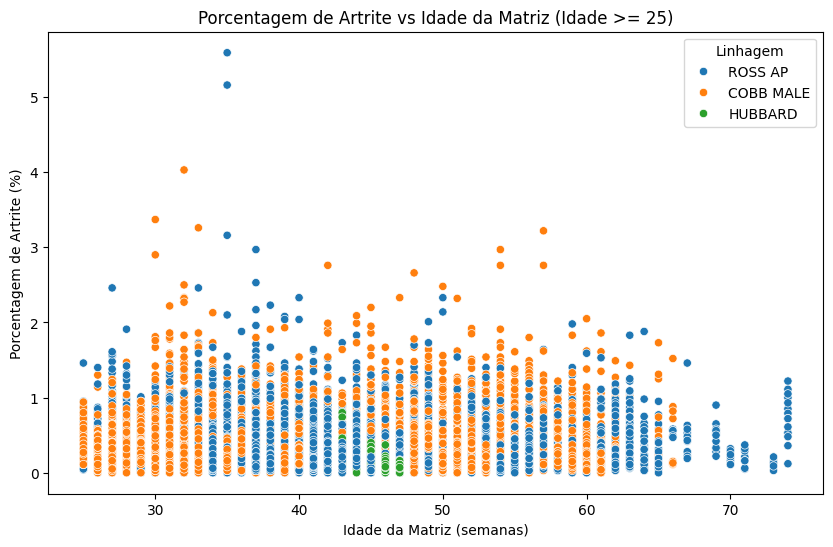

Correlação entre Idade da Matriz (>=25) e Artrite: 0.04


In [7]:
# Scatter plot de artrite vs idade da matriz (considerando apenas idades >= 25)
df_idade_filtrada = df[df['Idade_Matriz'] >= 25]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Idade_Matriz', y='Artrite_pct', hue='Linhagem', data=df_idade_filtrada)
plt.title('Porcentagem de Artrite vs Idade da Matriz (Idade >= 25)')
plt.xlabel('Idade da Matriz (semanas)')
plt.ylabel('Porcentagem de Artrite (%)')
plt.show()

# Correlação
correlation_filtrada = df_idade_filtrada['Idade_Matriz'].corr(df_idade_filtrada['Artrite_pct'])
print(f'Correlação entre Idade da Matriz (>=25) e Artrite: {correlation_filtrada:.2f}')

### 4. Artrite por Fornecedor

Analisando a prevalência de artrite por fornecedor.

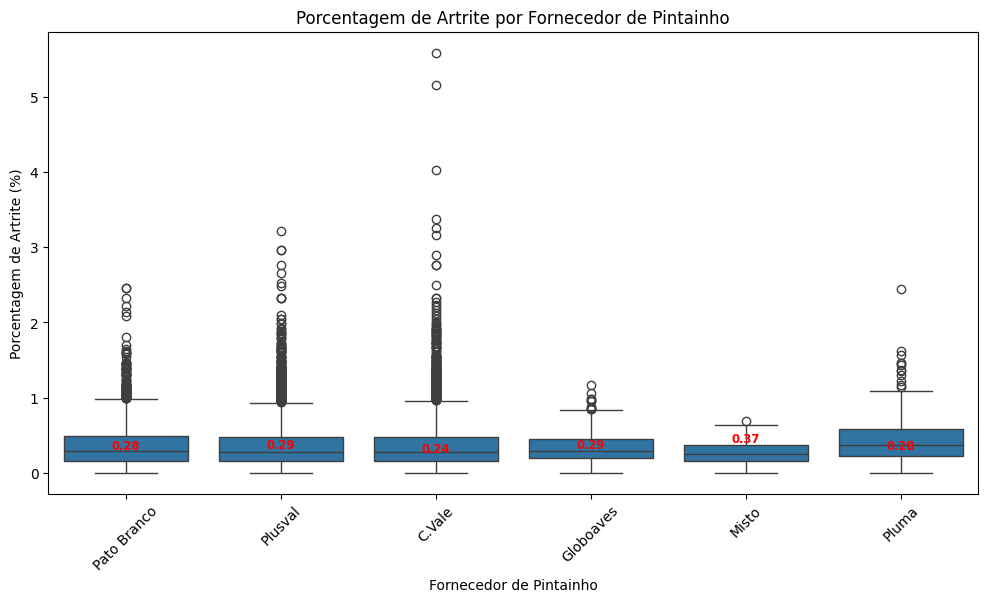

Média de artrite por fornecedor de pintainho:
Fornecedor_Pintainho
C.Vale         0.362819
Globoaves      0.335821
Misto          0.273636
Pato Branco    0.367647
Pluma          0.445878
Plusval        0.356576
Name: Artrite_pct, dtype: float64


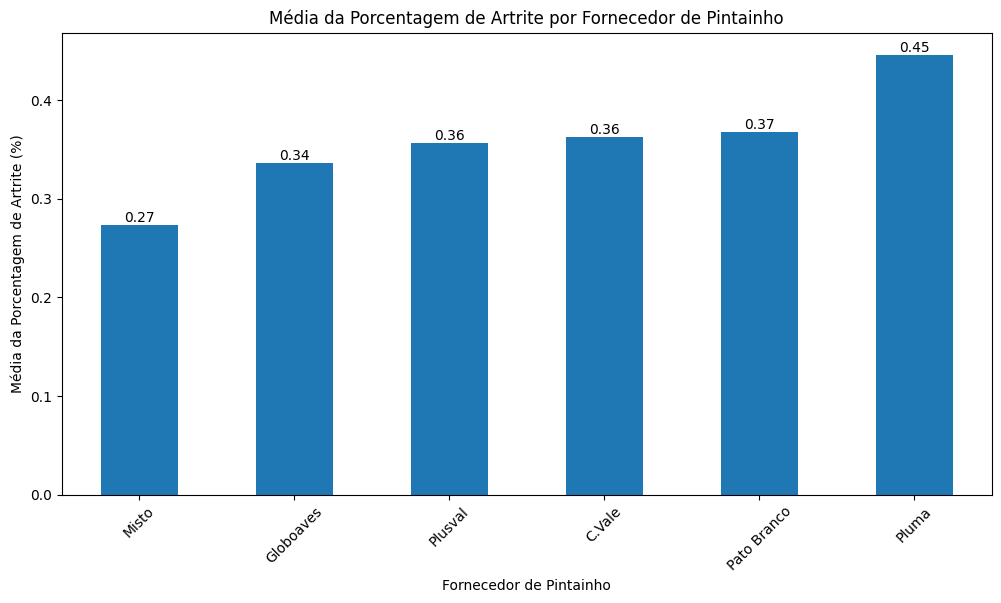

In [8]:
# Boxplot de artrite por fornecedor de pintainho
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Fornecedor_Pintainho', y='Artrite_pct', data=df)
plt.title('Porcentagem de Artrite por Fornecedor de Pintainho')
plt.xlabel('Fornecedor de Pintainho')
plt.ylabel('Porcentagem de Artrite (%)')
plt.xticks(rotation=45)

# Adicionar rótulos da mediana em cada boxplot
medians = df.groupby(['Fornecedor_Pintainho'])['Artrite_pct'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, median_labels[tick], 
            horizontalalignment='center', size='small', color='red', weight='semibold')

plt.show()

# Média de artrite por fornecedor de pintainho
mean_artrite_fornecedor = df.groupby('Fornecedor_Pintainho')['Artrite_pct'].mean()
print('Média de artrite por fornecedor de pintainho:')
print(mean_artrite_fornecedor)

# Gráfico de barras da média de artrite por fornecedor de pintainho
plt.figure(figsize=(12, 6))
ax = mean_artrite_fornecedor.sort_values().plot(kind='bar')
plt.title('Média da Porcentagem de Artrite por Fornecedor de Pintainho')
plt.xlabel('Fornecedor de Pintainho')
plt.ylabel('Média da Porcentagem de Artrite (%)')
plt.xticks(rotation=45)

# Adicionando rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## 5. Análise Temporal de Artrite

A célula abaixo realiza uma análise de série temporal da prevalência de artrite nas diferentes linhagens. Os dados são processados para transformar as datas de abate em um índice temporal, separando os dados por linhagem (ROSS AP e COBB MALE). Em seguida, calculamos a média semanal de artrite para cada linhagem e visualizamos como os percentuais variam ao longo do tempo, permitindo identificar tendências, sazonalidades ou padrões temporais na ocorrência de artrite entre as diferentes linhagens de frangos.



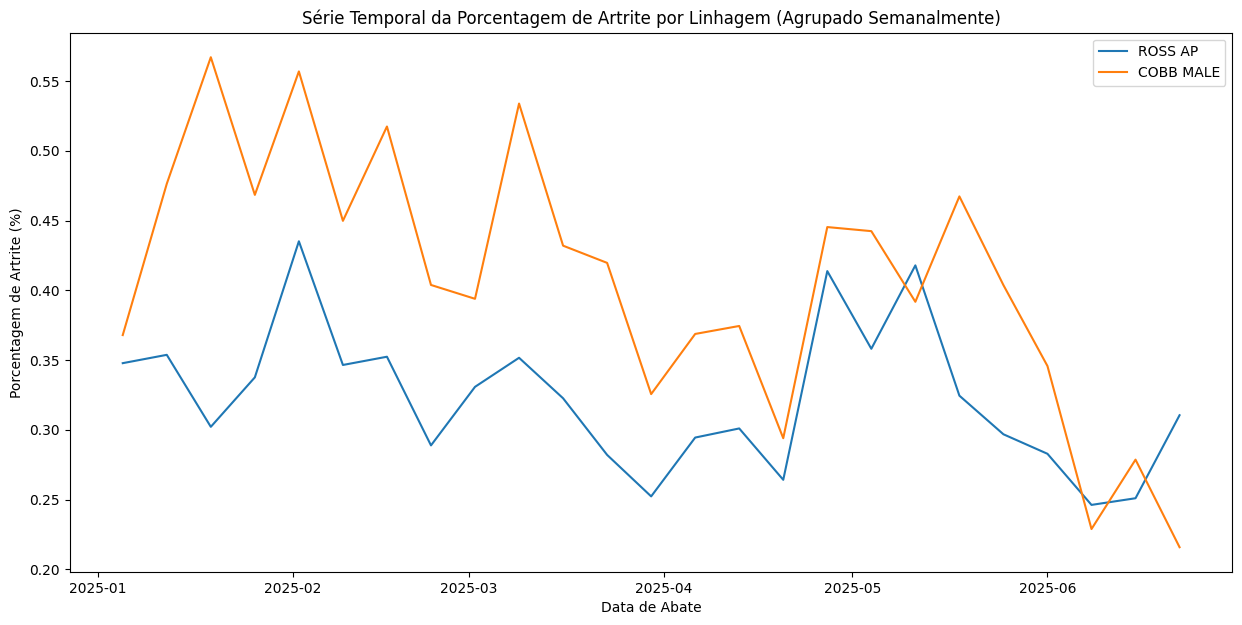

In [9]:
# Preparando os dados para análise de séries temporais
df['Data_Abate'] = pd.to_datetime(df['Data_Abate'])

# Criando um DataFrame para cada linhagem
df_ross = df[df['Linhagem'] == 'ROSS AP'].set_index('Data_Abate').sort_index()
df_cobb = df[df['Linhagem'] == 'COBB MALE'].set_index('Data_Abate').sort_index()

# Agregando os dados por data, calculando a média da porcentagem de artrite
ts_ross = df_ross['Artrite_pct'].resample('W').mean()
ts_cobb = df_cobb['Artrite_pct'].resample('W').mean()

# Plotando as séries temporais
plt.figure(figsize=(15, 7))
plt.plot(ts_ross, label='ROSS AP')
plt.plot(ts_cobb, label='COBB MALE')
plt.title('Série Temporal da Porcentagem de Artrite por Linhagem (Agrupado Semanalmente)')
plt.xlabel('Data de Abate')
plt.ylabel('Porcentagem de Artrite (%)')
plt.legend()
plt.show()

A célula abaixo realiza uma análise de séries temporais da porcentagem de artrite, segmentando os dados por fornecedor de pintainhos. Inicialmente, garante-se que a coluna 'Data_Abate' esteja no formato datetime. Em seguida, itera-se sobre cada fornecedor único de pintainhos presente nos dados. Para cada fornecedor, um DataFrame é criado, indexado pela 'Data_Abate' e ordenado temporalmente. A média semanal da porcentagem de artrite é calculada para cada fornecedor. Para lidar com possíveis lacunas nas séries temporais, aplica-se uma interpolação linear. Por fim, cada série temporal é plotada em um gráfico, permitindo a visualização e comparação da evolução da artrite ao longo do tempo para cada fornecedor de pintainhos.

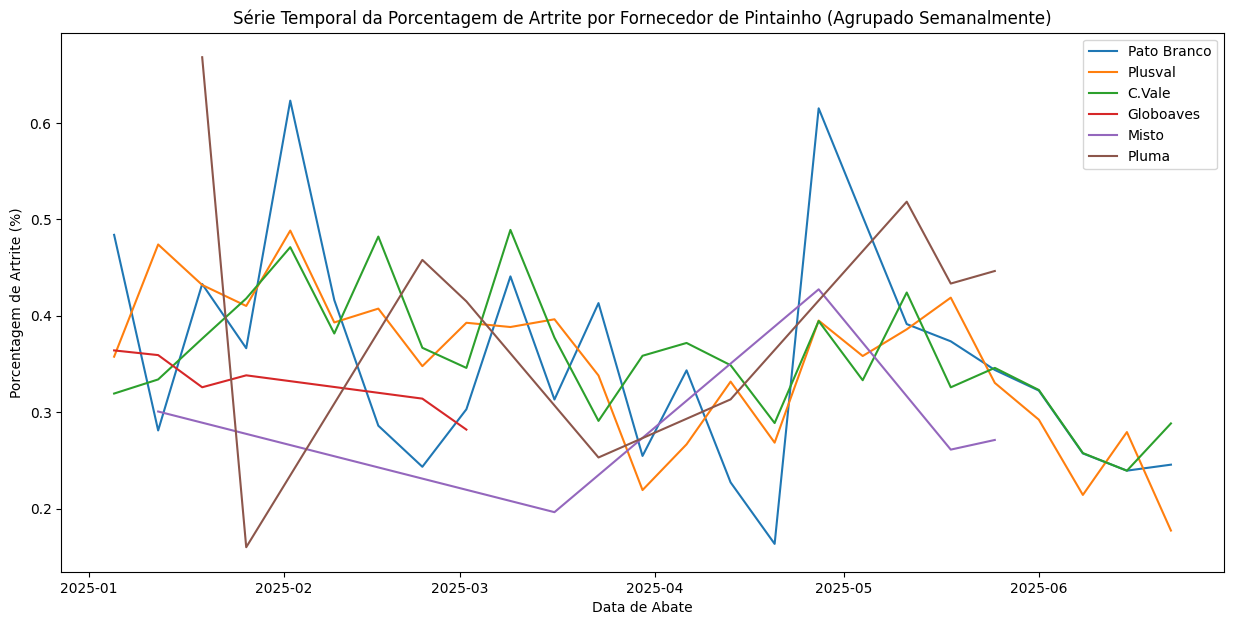

In [10]:
# Preparando os dados para análise de séries temporais por Fornecedor de Pintainho
df['Data_Abate'] = pd.to_datetime(df['Data_Abate'])

# Criando um DataFrame para cada fornecedor de pintainho
fornecedores = df['Fornecedor_Pintainho'].unique()

# Agregando os dados por data, calculando a média da porcentagem de artrite
plt.figure(figsize=(15, 7))
for fornecedor in fornecedores:
    df_fornecedor = df[df['Fornecedor_Pintainho'] == fornecedor].set_index('Data_Abate').sort_index()
    ts_fornecedor = df_fornecedor['Artrite_pct'].resample('W').mean()
    # Interpolação linear para preencher lacunas
    ts_fornecedor = ts_fornecedor.interpolate(method='linear')
    plt.plot(ts_fornecedor, label=fornecedor)

plt.title('Série Temporal da Porcentagem de Artrite por Fornecedor de Pintainho (Agrupado Semanalmente)')
plt.xlabel('Data de Abate')
plt.ylabel('Porcentagem de Artrite (%)')
plt.legend()
plt.show()

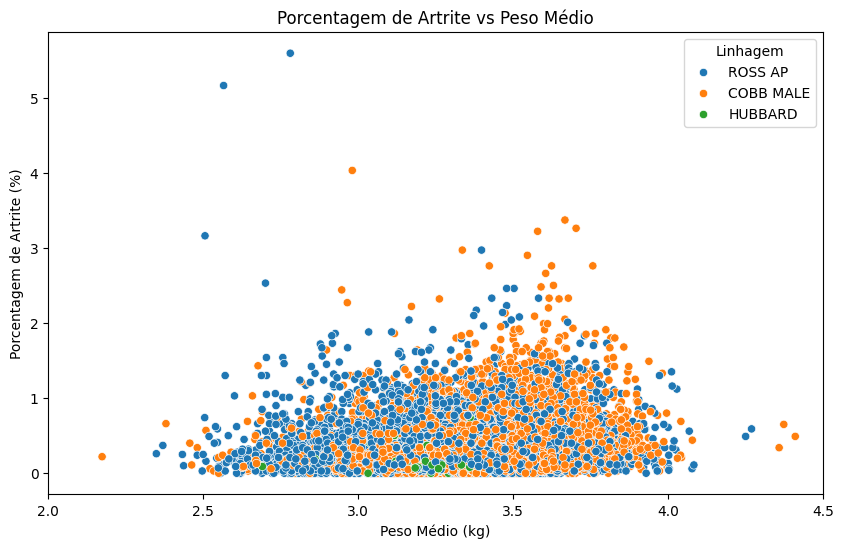

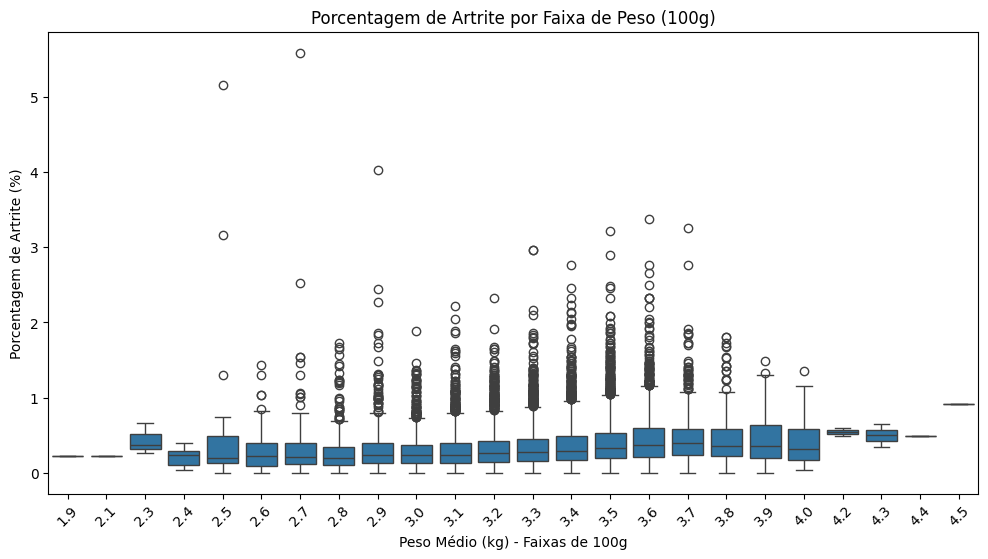

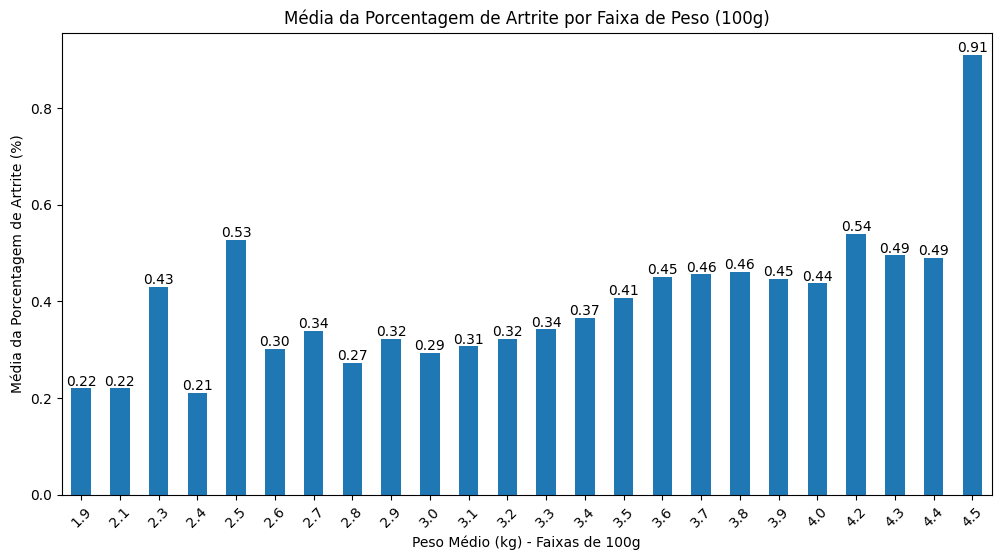

In [11]:
# Scatter plot de artrite vs peso médio (desconsiderando peso médio = 0)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Peso_Medio',
    y='Artrite_pct',
    hue='Linhagem',
    data=df[df['Peso_Medio'] > 0]
)
plt.title('Porcentagem de Artrite vs Peso Médio')
plt.xlabel('Peso Médio (kg)')
plt.ylabel('Porcentagem de Artrite (%)')
plt.xlim(2.0, 4.5)
plt.show()

# Criando faixas de peso a cada 100 gramas (desconsiderando peso médio = 0)
df['Peso_Medio_Arredondado'] = np.where(
    df['Peso_Medio'] > 0,
    np.floor(df['Peso_Medio'] * 10) / 10,
    np.nan
)

# Boxplot de artrite por faixa de peso (desconsiderando peso médio = 0)
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Peso_Medio_Arredondado',
    y='Artrite_pct',
    data=df[df['Peso_Medio_Arredondado'].notnull()]
)
plt.title('Porcentagem de Artrite por Faixa de Peso (100g)')
plt.xlabel('Peso Médio (kg) - Faixas de 100g')
plt.ylabel('Porcentagem de Artrite (%)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras da média de artrite por faixa de peso (100g)
mean_artrite_peso = df.groupby('Peso_Medio_Arredondado')['Artrite_pct'].mean().dropna()
plt.figure(figsize=(12, 6))
ax = mean_artrite_peso.sort_index().plot(kind='bar')
plt.title('Média da Porcentagem de Artrite por Faixa de Peso (100g)')
plt.xlabel('Peso Médio (kg) - Faixas de 100g')
plt.ylabel('Média da Porcentagem de Artrite (%)')
plt.xticks(rotation=45)

# Adicionando rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Classificacao_Label
D    5806
C    3904
B    3610
E    2935
A    1209
F     901
Name: count, dtype: int64


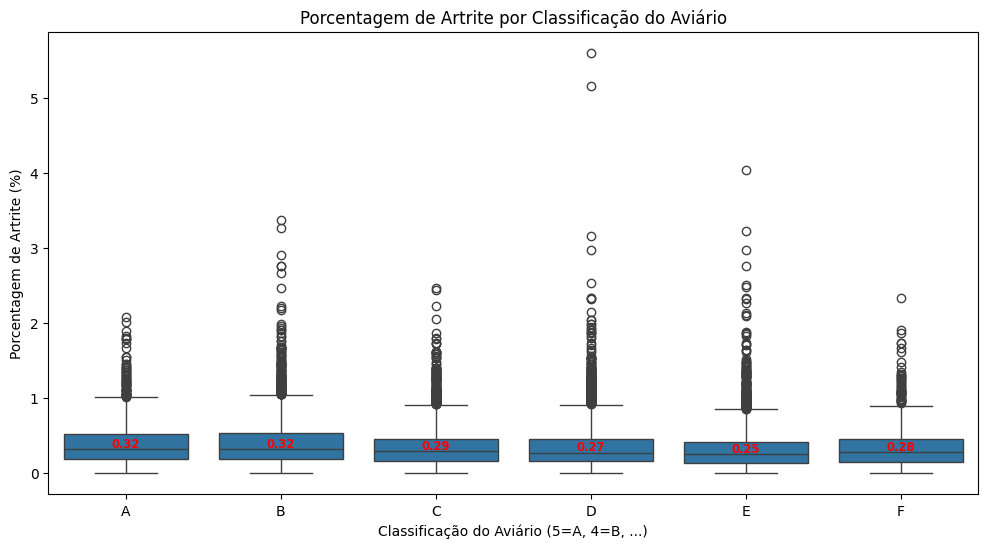

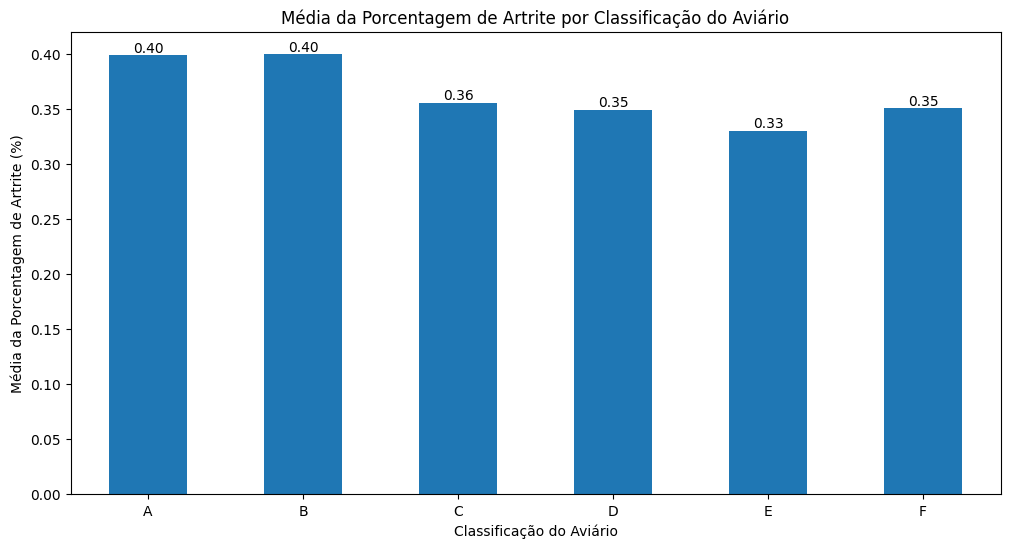

Média de artrite por classificação do aviário:
Classificacao_Label
A    0.399024
B    0.399842
C    0.355848
D    0.349395
E    0.330368
F    0.351121
Name: Artrite_pct, dtype: float64


In [12]:
# Mapeando os valores da coluna 'Classificacao' para os novos rótulos
classificacao_mapping = {
    5: 'A',
    4: 'B',
    3: 'C',
    2: 'D',
    1: 'E',
    0: 'F'
}

# Aplicando o mapeamento à coluna 'Classificacao'
df['Classificacao_Label'] = df['Classificacao'].map(classificacao_mapping)

# Exibindo os valores únicos e suas contagens na nova coluna
print(df['Classificacao_Label'].value_counts())

# Boxplot de artrite por Classificação do Aviário
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Classificacao_Label', y='Artrite_pct', data=df, order=sorted(df['Classificacao_Label'].unique()))
plt.title('Porcentagem de Artrite por Classificação do Aviário')
plt.xlabel('Classificação do Aviário (5=A, 4=B, ...)')
plt.ylabel('Porcentagem de Artrite (%)')

# Adicionar rótulos da mediana em cada boxplot
medians = df.groupby(['Classificacao_Label'])['Artrite_pct'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, median_labels[tick], 
            horizontalalignment='center', size='small', color='red', weight='semibold')

plt.show()

# Gráfico de barras da média de artrite por Classificação do Aviário
mean_artrite_classificacao = df.groupby('Classificacao_Label')['Artrite_pct'].mean()
plt.figure(figsize=(12, 6))
ax = mean_artrite_classificacao.loc[sorted(mean_artrite_classificacao.index)].plot(kind='bar')
plt.title('Média da Porcentagem de Artrite por Classificação do Aviário')
plt.xlabel('Classificação do Aviário')
plt.ylabel('Média da Porcentagem de Artrite (%)')
plt.xticks(rotation=0)

# Adicionando rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

print('Média de artrite por classificação do aviário:')
print(df.groupby('Classificacao_Label')['Artrite_pct'].mean())

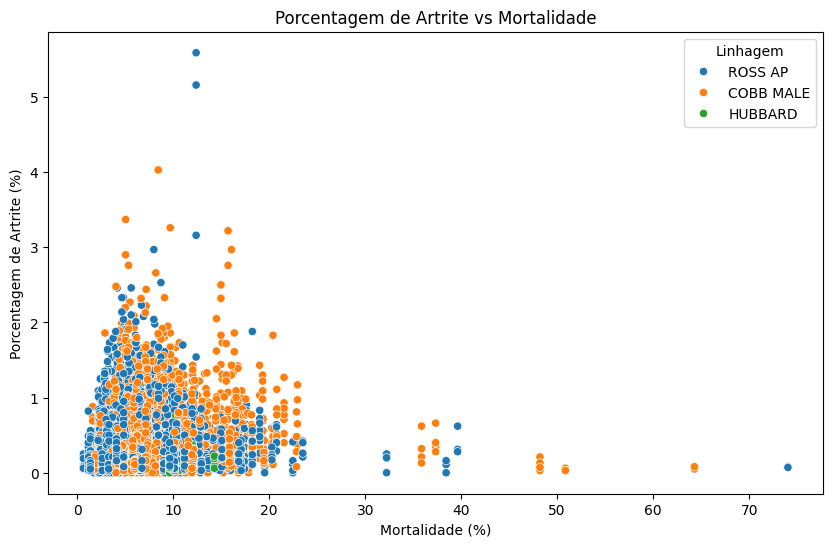

Correlação entre Mortalidade e Artrite: 0.10


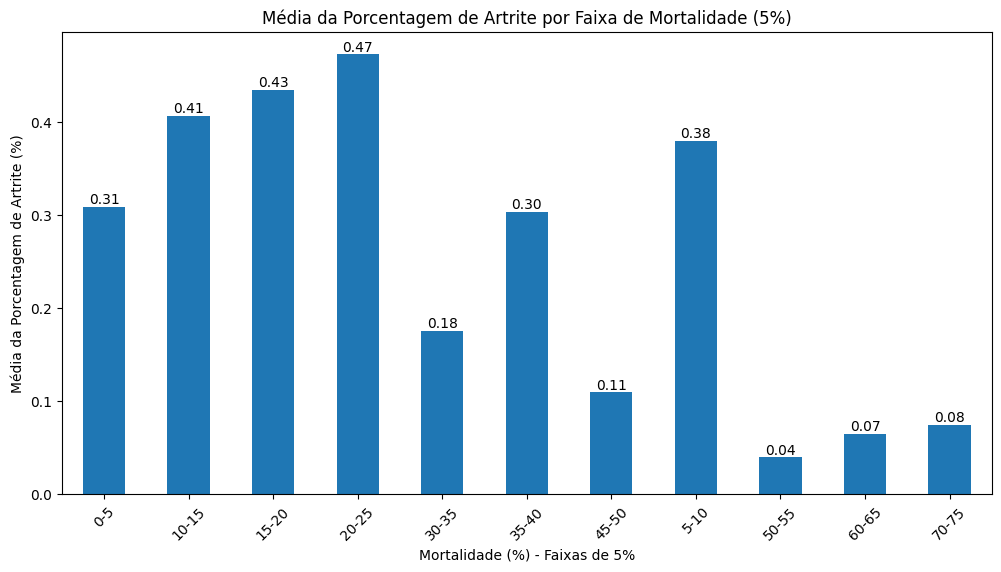

In [13]:
# Scatter plot de artrite vs mortalidade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mortalidade', y='Artrite_pct', hue='Linhagem', data=df)
plt.title('Porcentagem de Artrite vs Mortalidade')
plt.xlabel('Mortalidade (%)')
plt.ylabel('Porcentagem de Artrite (%)')
plt.show()

# Correlação entre artrite e mortalidade
correlation = df['Mortalidade'].corr(df['Artrite_pct'])
print(f'Correlação entre Mortalidade e Artrite: {correlation:.2f}')

# Criando faixas de mortalidade a cada 5%
df['Mortalidade_Arredondada'] = np.floor(df['Mortalidade'] / 5) * 5

# Criando rótulos para as faixas de mortalidade
df['Mortalidade_Faixa'] = df['Mortalidade_Arredondada'].apply(lambda x: f'{int(x)}-{int(x+5)}' if not pd.isna(x) else 'NaN')

# Gráfico de barras da média de artrite por faixa de mortalidade
mean_artrite_mortalidade = df.groupby('Mortalidade_Faixa')['Artrite_pct'].mean().dropna()
plt.figure(figsize=(12, 6))
ax = mean_artrite_mortalidade.sort_index().plot(kind='bar')
plt.title('Média da Porcentagem de Artrite por Faixa de Mortalidade (5%)')
plt.xlabel('Mortalidade (%) - Faixas de 5%')
plt.ylabel('Média da Porcentagem de Artrite (%)')
plt.xticks(rotation=45)

# Adicionando rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

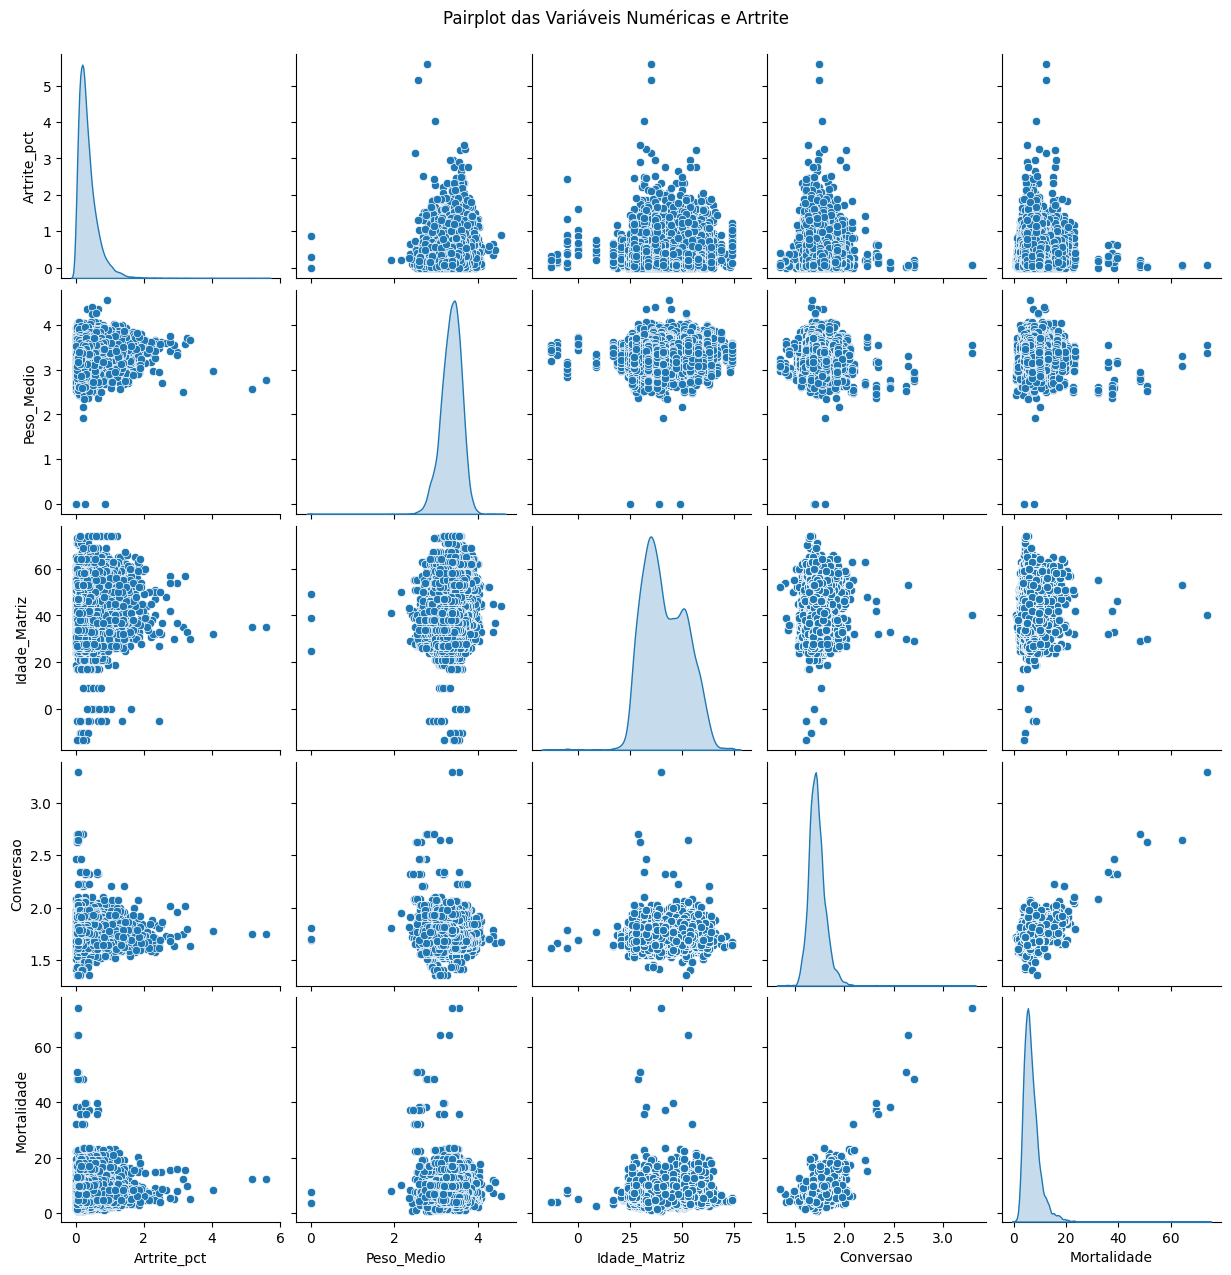

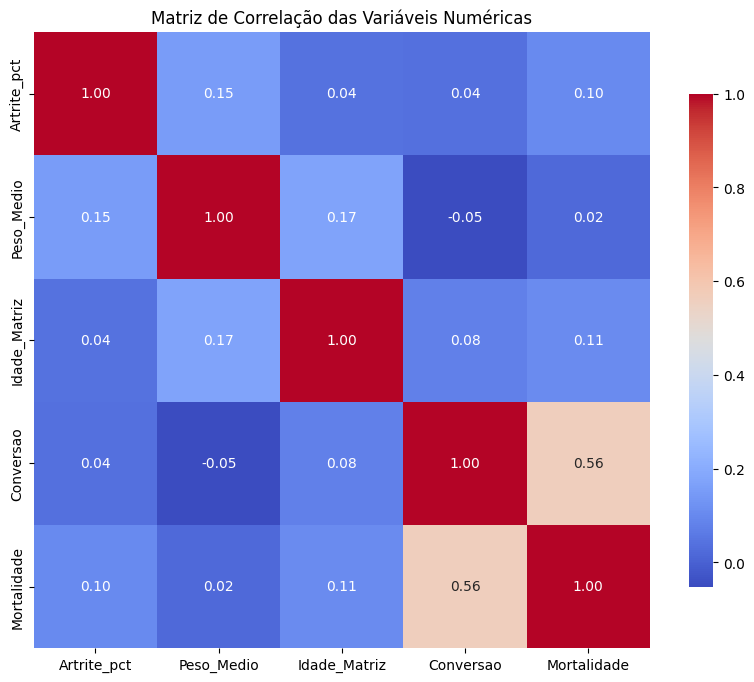

In [14]:
# Selecionando apenas colunas numéricas relevantes e a coluna de artrite
num_cols = ['Artrite_pct', 'Peso_Medio', 'Idade_Matriz', 'Conversao', 'Mortalidade']
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle('Pairplot das Variáveis Numéricas e Artrite', y=1.02)
plt.show()

# Análise de correlação entre as variáveis numéricas
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


A célula abaixo realiza uma análise dos núcleos (granjas) com as maiores e menores médias de artrite. Ela:

- Agrupa os dados por 'Nucleo' e calcula a média da porcentagem de artrite para cada um.
- Identifica os 10 núcleos com maior e menor média de artrite.
- Exibe os proprietários associados a cada núcleo nesses grupos.
- Plota gráficos de barras horizontais mostrando as médias de artrite dos top 10 e bottom 10 núcleos, usando o nome do proprietário como rótulo.
- Calcula e exibe a quantidade de lotes com a linhagem 'COBB MALE' nesses núcleos, além de plotar gráficos mostrando essa distribuição.
- Permite identificar quais núcleos e proprietários têm maior ou menor prevalência de artrite, além de relacionar com a linhagem dos frangos.

Top 10 Núcleos com Maior Média de Artrite:
Núcleo: 42, Média de Artrite: 1.15, Proprietários: CARLOS ROBERTO BASSO
Núcleo: 243, Média de Artrite: 0.84, Proprietários: JURANDIR MESSIAS ELIAS
Núcleo: 103, Média de Artrite: 0.83, Proprietários: NEUDI PANDOLPHO, VERA LUIZA MOTTIN BENATTI
Núcleo: 278, Média de Artrite: 0.80, Proprietários: VALDENIR LEAL DOS SANTOS
Núcleo: 170, Média de Artrite: 0.80, Proprietários: GERVASIO RIBEIRO MORAES
Núcleo: 164, Média de Artrite: 0.79, Proprietários: ALCINDO LORENZI
Núcleo: 78, Média de Artrite: 0.77, Proprietários: JOSE HABOWSKI
Núcleo: 194, Média de Artrite: 0.75, Proprietários: ANAI BACCI NAVES
Núcleo: 338, Média de Artrite: 0.70, Proprietários: JOSE ONIVALDO GOMES
Núcleo: 90, Média de Artrite: 0.68, Proprietários: ODAIR JOSE FAVARO

Bottom 10 Núcleos com Menor Média de Artrite:
Núcleo: 301, Média de Artrite: 0.12, Proprietários: EDITH KURTZ
Núcleo: 291, Média de Artrite: 0.12, Proprietários: ALOISIO RODOLFO ANGST
Núcleo: 67, Média de Artrite: 0.13

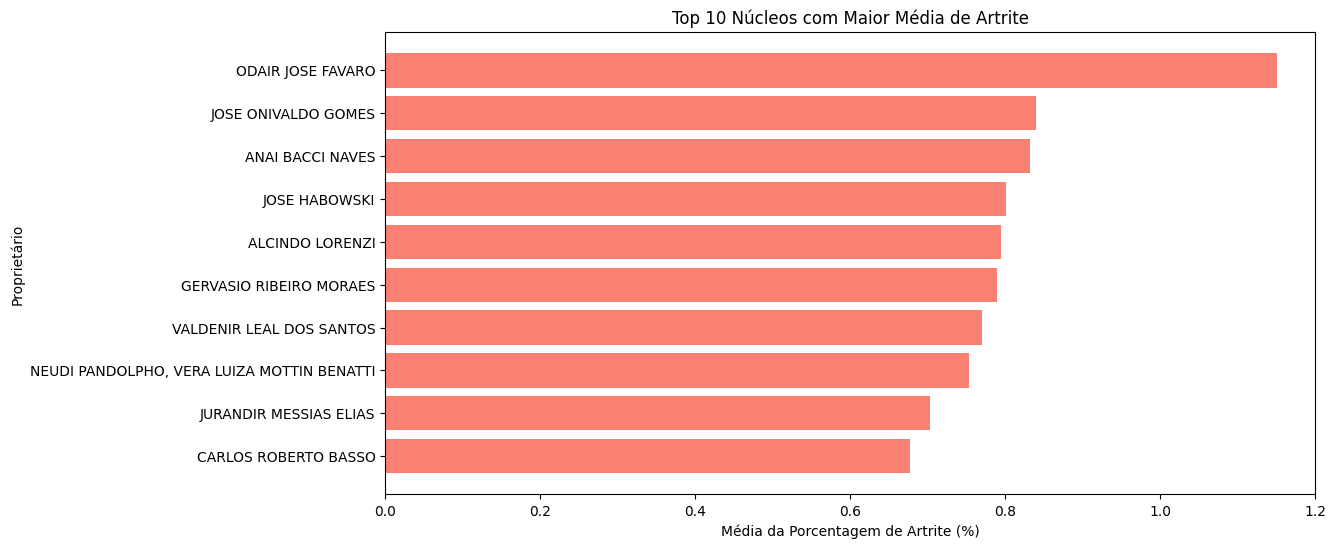

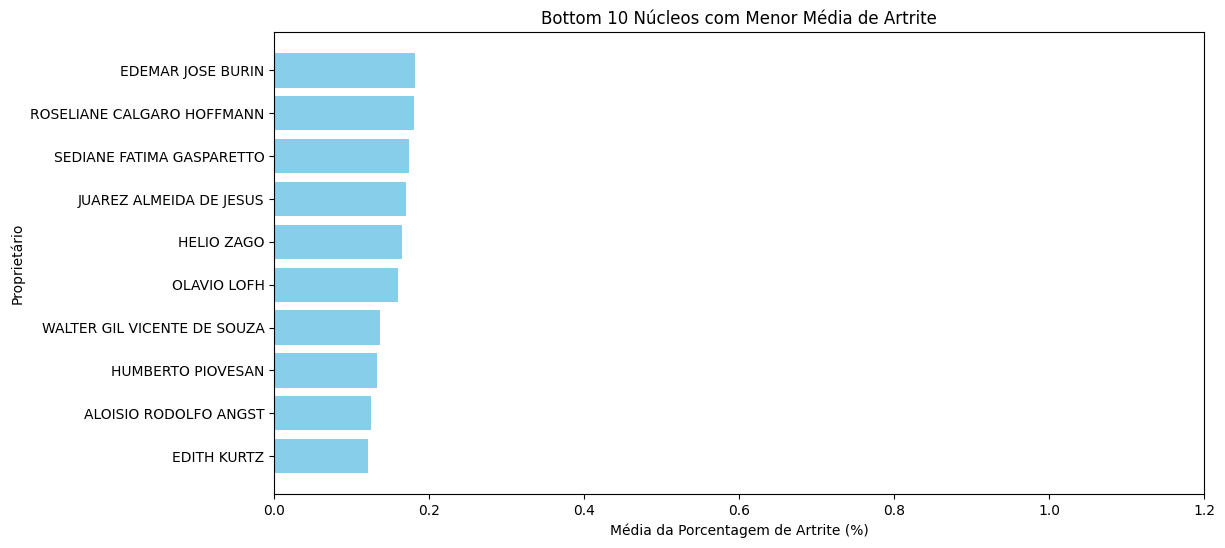


Quantidade de cargas com a linhagem COBB MALE nos Top 10 Núcleos:
Nucleo
170    17
103    16
243    14
338    14
90     10
42      9
78      8
194     6
278     4
dtype: int64

Quantidade de cargas com a linhagem COBB MALE nos Bottom 10 Núcleos:
Nucleo
367    36
53     22
15     15
327     5
283     5
67      5
79      5
dtype: int64


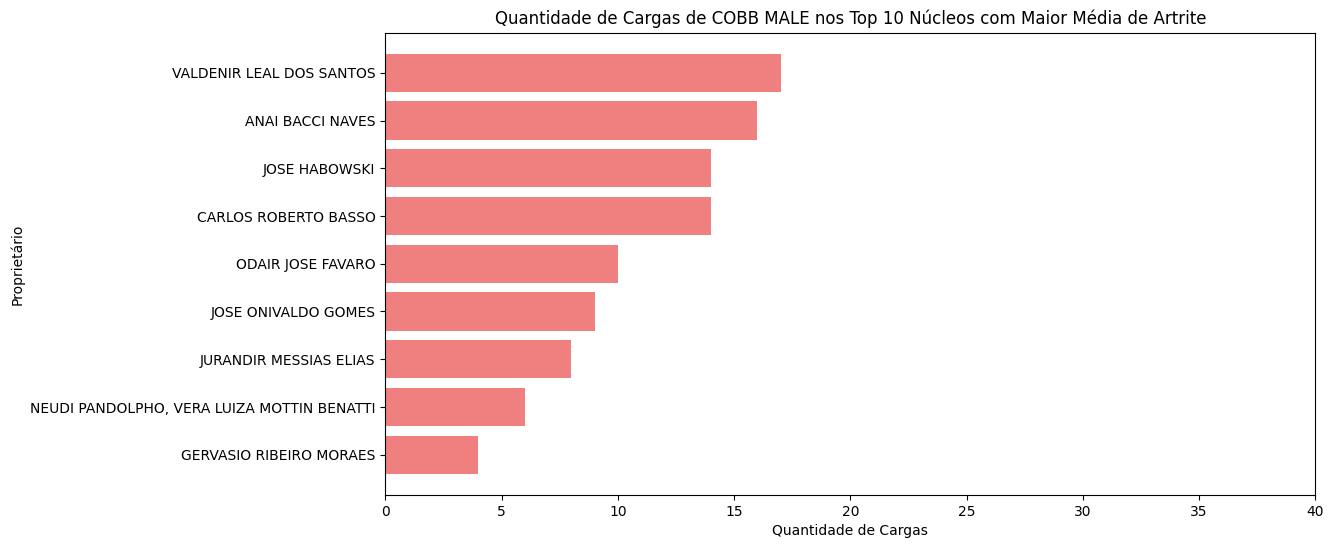

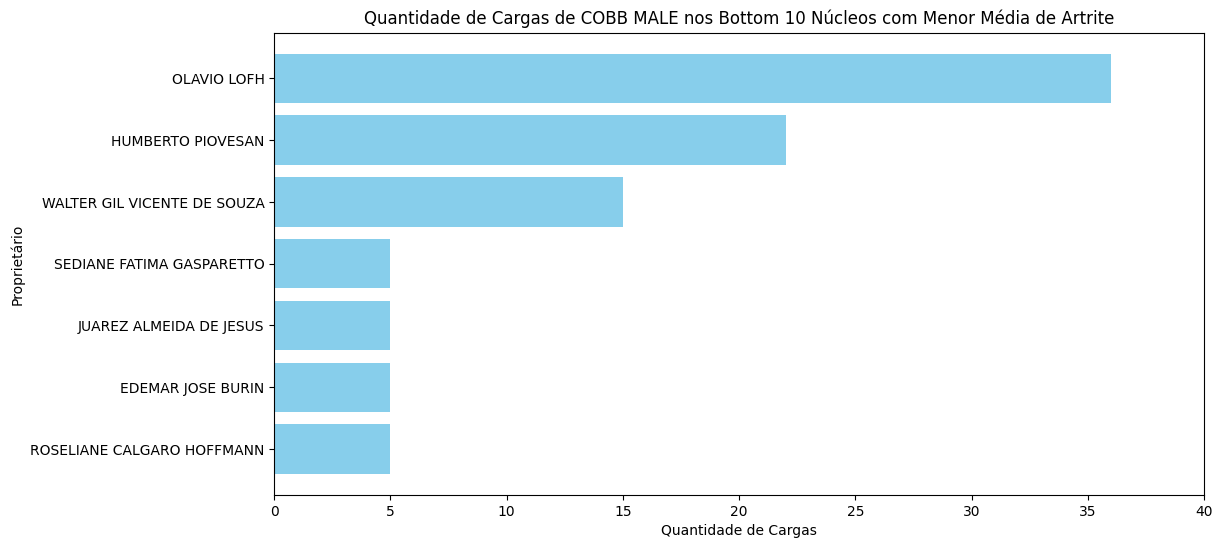


Média da Porcentagem de Artrite por Proprietário (COBB MALE) nos Top 10 Núcleos:
Proprietário
GERVASIO RIBEIRO MORAES      1.537059
VERA LUIZA MOTTIN BENATTI    1.167500
CARLOS ROBERTO BASSO         1.150000
JOSE ONIVALDO GOMES          1.077857
ODAIR JOSE FAVARO            1.032000
NEUDI PANDOLPHO              0.970000
JOSE HABOWSKI                0.770000
ANAI BACCI NAVES             0.738333
JURANDIR MESSIAS ELIAS       0.721429
VALDENIR LEAL DOS SANTOS     0.665000
Name: Artrite_pct, dtype: float64

Média da Porcentagem de Artrite por Proprietário (COBB MALE) nos Bottom 10 Núcleos:
Proprietário
HUMBERTO PIOVESAN              0.260000
EDEMAR JOSE BURIN              0.239091
WALTER GIL VICENTE DE SOUZA    0.206000
OLAVIO LOFH                    0.182000
ROSELIANE CALGARO HOFFMANN     0.178333
JUAREZ ALMEIDA DE JESUS        0.164667
SEDIANE FATIMA GASPARETTO      0.100000
Name: Artrite_pct, dtype: float64


In [15]:
# Agrupando por 'Nucleo' e calculando a média da 'Artrite_pct'
mean_artrite_nucleo = df.groupby('Nucleo')['Artrite_pct'].mean()

# Ordenando os núcleos pela média de 'Artrite_pct' em ordem decrescente
top10_nucleos = mean_artrite_nucleo.sort_values(ascending=False).head(10)

# Ordenando os núcleos pela média de 'Artrite_pct' em ordem crescente
bottom10_nucleos = mean_artrite_nucleo.sort_values(ascending=True).head(10)

print("Top 10 Núcleos com Maior Média de Artrite:")
for nucleo, artrite_media in top10_nucleos.items():
    # Filtrando o DataFrame para obter os proprietários do núcleo
    proprietarios = df[df['Nucleo'] == nucleo]['Proprietário'].unique()
    proprietarios_str = ', '.join(proprietarios)  # Convertendo a lista de proprietários em uma string
    print(f"Núcleo: {nucleo}, Média de Artrite: {artrite_media:.2f}, Proprietários: {proprietarios_str}")

print("\nBottom 10 Núcleos com Menor Média de Artrite:")
for nucleo, artrite_media in bottom10_nucleos.items():
    # Filtrando o DataFrame para obter os proprietários do núcleo
    proprietarios = df[df['Nucleo'] == nucleo]['Proprietário'].unique()
    proprietarios_str = ', '.join(proprietarios)  # Convertendo a lista de proprietários em uma string
    print(f"Núcleo: {nucleo}, Média de Artrite: {artrite_media:.2f}, Proprietários: {proprietarios_str}")

# Criando um dicionário para mapear Núcleo para Proprietário
nucleo_para_proprietario = df.groupby('Nucleo')['Proprietário'].apply(lambda x: ', '.join(x.unique())).to_dict()

# Usando o dicionário para mapear os nomes dos proprietários para os Top 10 núcleos
top10_proprietarios = top10_nucleos.index.map(nucleo_para_proprietario)

# Plotando as médias de artrite para os top 10 núcleos
plt.figure(figsize=(12, 6))
plt.barh(top10_proprietarios, top10_nucleos.sort_values(), color='salmon')
plt.title('Top 10 Núcleos com Maior Média de Artrite')
plt.xlabel('Média da Porcentagem de Artrite (%)')
plt.ylabel('Proprietário')
plt.xlim(0, 1.2)  # Mantendo o mesmo limite do eixo x
plt.show()

# Usando o dicionário para mapear os nomes dos proprietários para os Bottom 10 núcleos
bottom10_proprietarios = bottom10_nucleos.index.map(nucleo_para_proprietario)

# Plotando as médias de artrite para os bottom 10 núcleos
plt.figure(figsize=(12, 6))
plt.barh(bottom10_proprietarios, bottom10_nucleos.sort_values(ascending=True), color='skyblue')
plt.title('Bottom 10 Núcleos com Menor Média de Artrite')
plt.xlabel('Média da Porcentagem de Artrite (%)')
plt.ylabel('Proprietário')
plt.xlim(0, 1.2)  # Mantendo o mesmo limite do eixo x
plt.show()

# Filtrando o DataFrame para incluir apenas os núcleos presentes nos Top 10 e Bottom 10
df_top_bottom = df[df['Nucleo'].isin(top10_nucleos.index.union(bottom10_nucleos.index))]

# Para os Top 10 núcleos, calcular a quantidade de lotes com a linhagem 'COBB MALE'
top10_nucleos_cobb = df_top_bottom[df_top_bottom['Nucleo'].isin(top10_nucleos.index) & (df_top_bottom['Linhagem'] == 'COBB MALE')].groupby('Nucleo').size().sort_values(ascending=False)

print("\nQuantidade de cargas com a linhagem COBB MALE nos Top 10 Núcleos:")
print(top10_nucleos_cobb)

# Para os Bottom 10 núcleos, calcular a quantidade de lotes com a linhagem 'COBB MALE'
bottom10_nucleos_cobb = df_top_bottom[df_top_bottom['Nucleo'].isin(bottom10_nucleos.index) & (df_top_bottom['Linhagem'] == 'COBB MALE')].groupby('Nucleo').size().sort_values(ascending=False)

print("\nQuantidade de cargas com a linhagem COBB MALE nos Bottom 10 Núcleos:")
print(bottom10_nucleos_cobb)

# Criando um dicionário para mapear Núcleo para Proprietário (usando o DataFrame filtrado)
nucleo_para_proprietario = df_top_bottom.groupby('Nucleo')['Proprietário'].apply(lambda x: ', '.join(x.unique())).to_dict()

# Mapeando os nomes dos proprietários para os Top 10 núcleos
top10_proprietarios_cobb = top10_nucleos_cobb.index.map(nucleo_para_proprietario)

# Plotando a quantidade de cargas de COBB MALE nos Top 10 núcleos
plt.figure(figsize=(12, 6))
plt.barh(top10_proprietarios_cobb, top10_nucleos_cobb.sort_values(), color='lightcoral')
plt.title('Quantidade de Cargas de COBB MALE nos Top 10 Núcleos com Maior Média de Artrite')
plt.xlabel('Quantidade de Cargas')
plt.ylabel('Proprietário')
plt.xlim(0, 40)  # Definindo limite do eixo x
plt.show()

# Mapeando os nomes dos proprietários para os Bottom 10 núcleos
bottom10_proprietarios_cobb = bottom10_nucleos_cobb.index.map(nucleo_para_proprietario)

# Plotando a quantidade de cargas de COBB MALE nos Bottom 10 núcleos
plt.figure(figsize=(12, 6))
plt.barh(bottom10_proprietarios_cobb, bottom10_nucleos_cobb.sort_values(), color='skyblue')
plt.title('Quantidade de Cargas de COBB MALE nos Bottom 10 Núcleos com Menor Média de Artrite')
plt.xlabel('Quantidade de Cargas')
plt.ylabel('Proprietário')
plt.xlim(0, 40)  # Usando o mesmo limite do eixo x do gráfico anterior
plt.show()

# Agrupando por 'Proprietário' e calculando a média da 'Artrite_pct' para COBB MALE nos Top 10
top10_proprietarios_artrite_cobb = df_top_bottom[(df_top_bottom['Nucleo'].isin(top10_nucleos.index)) & (df_top_bottom['Linhagem'] == 'COBB MALE')].groupby('Proprietário')['Artrite_pct'].mean().sort_values(ascending=False)

print("\nMédia da Porcentagem de Artrite por Proprietário (COBB MALE) nos Top 10 Núcleos:")
print(top10_proprietarios_artrite_cobb)

# Agrupando por 'Proprietário' e calculando a média da 'Artrite_pct' para COBB MALE nos Bottom 10
bottom10_proprietarios_artrite_cobb = df_top_bottom[(df_top_bottom['Nucleo'].isin(bottom10_nucleos.index)) & (df_top_bottom['Linhagem'] == 'COBB MALE')].groupby('Proprietário')['Artrite_pct'].mean().sort_values(ascending=False)

print("\nMédia da Porcentagem de Artrite por Proprietário (COBB MALE) nos Bottom 10 Núcleos:")
print(bottom10_proprietarios_artrite_cobb)

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


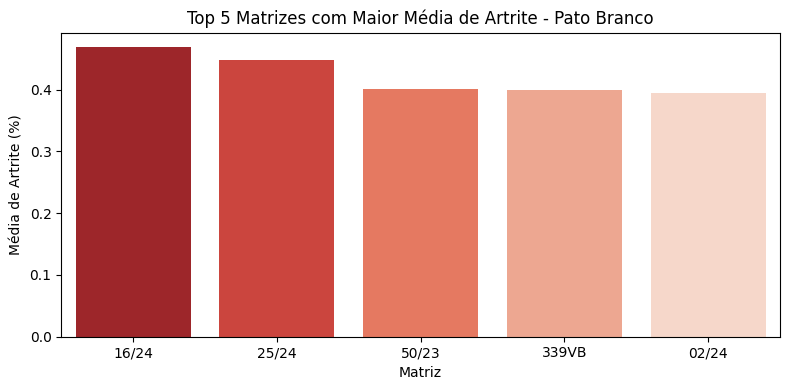

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


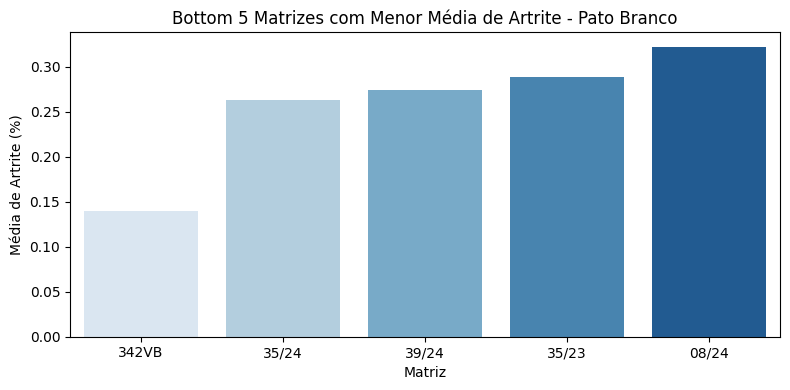

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


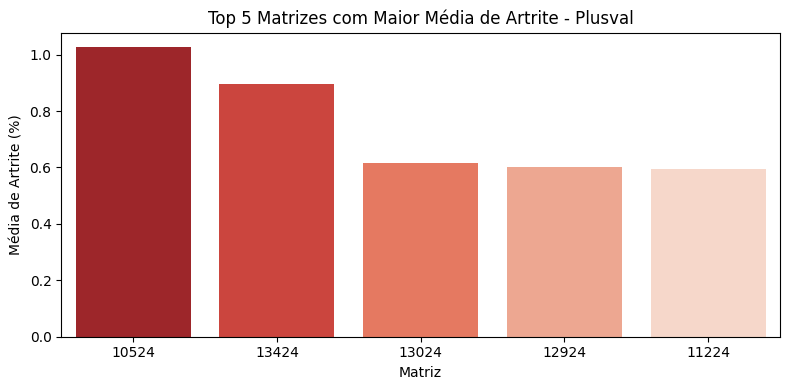

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


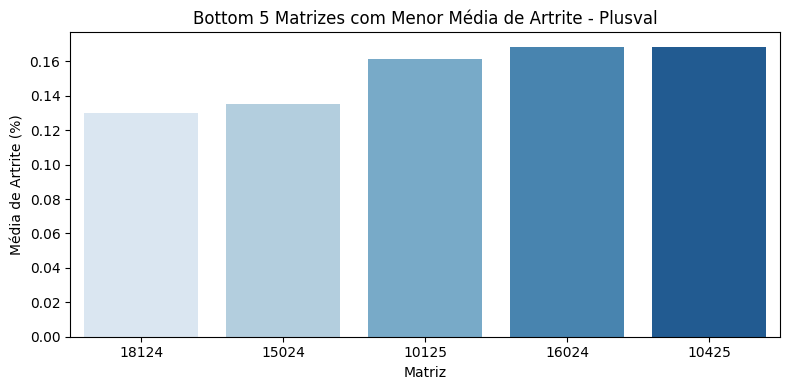

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


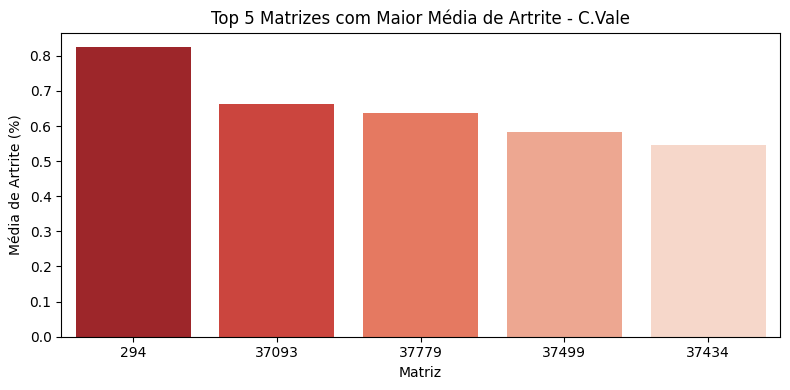

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


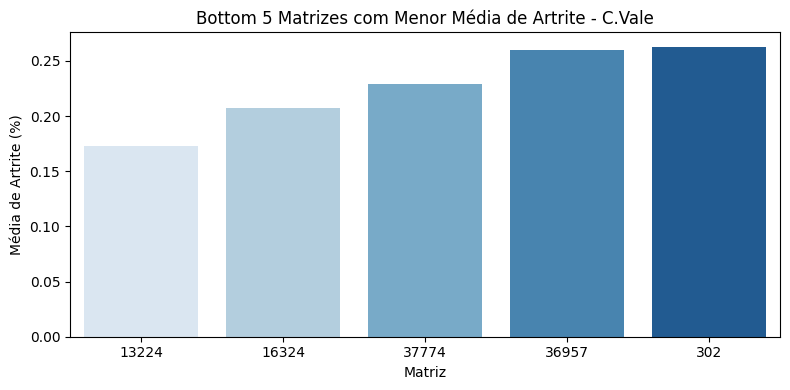

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


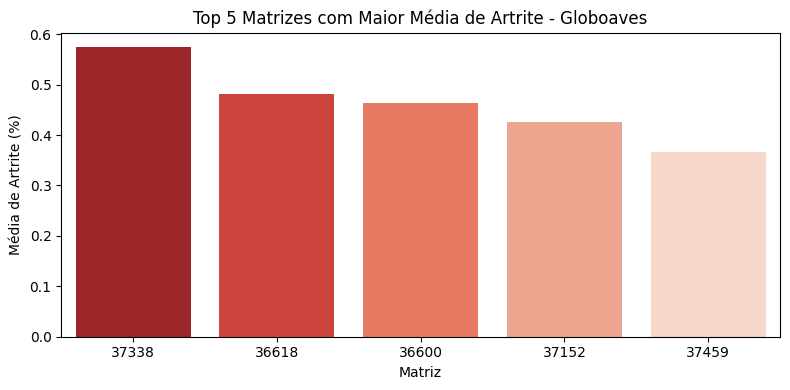

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


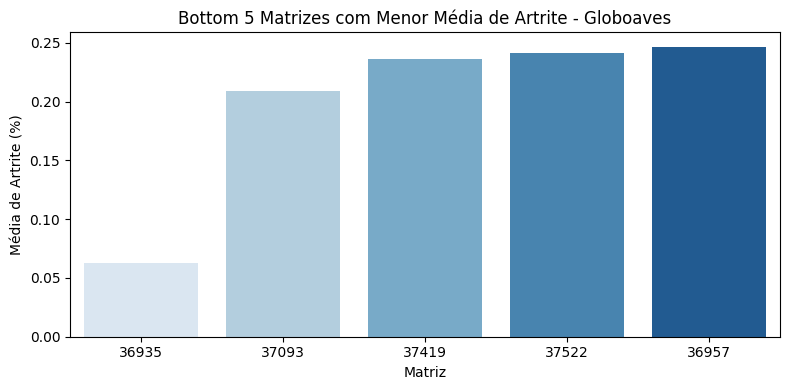

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


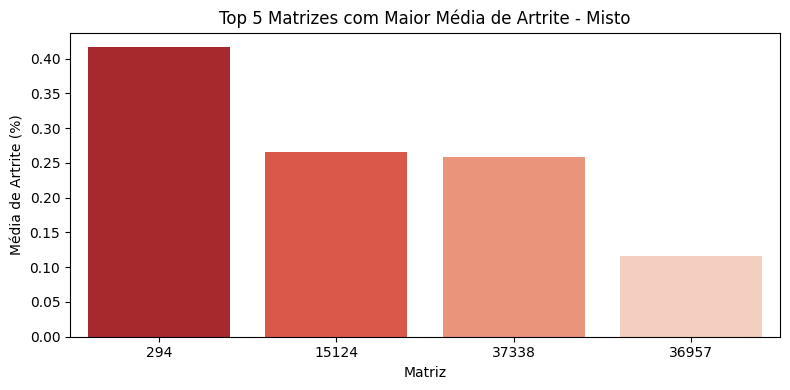

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


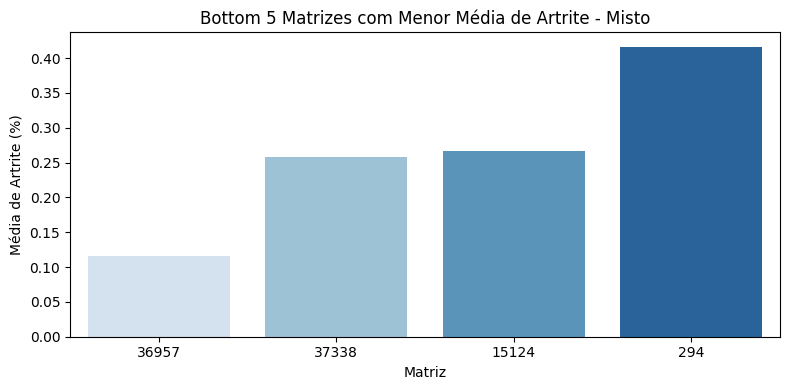

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


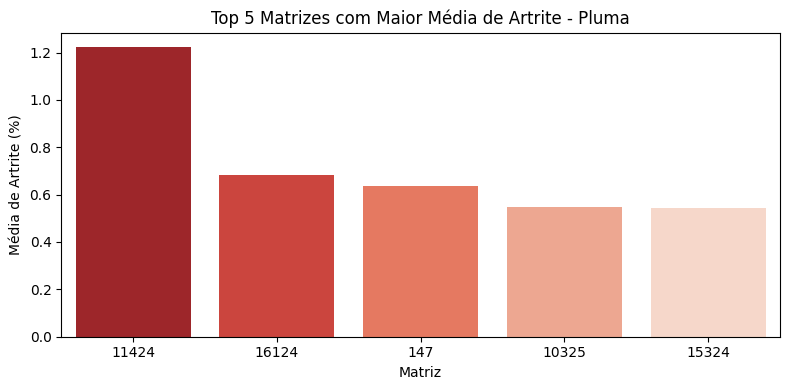

C:\Users\user\AppData\Local\Temp\ipykernel_8692\199001162.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


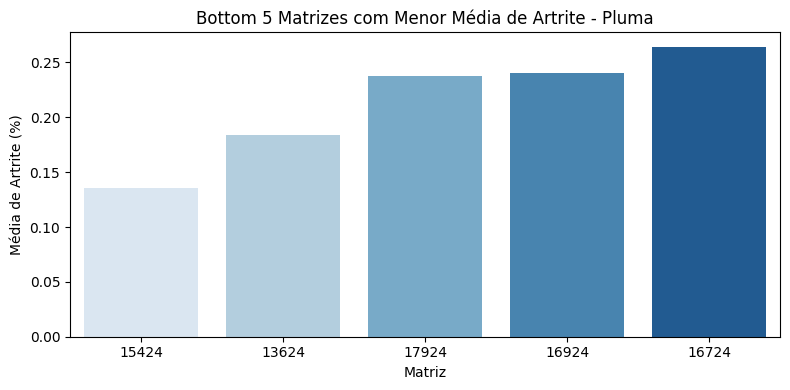

In [18]:
for fornecedor in fornecedores:
    top5 = top5_matrizes_df[top5_matrizes_df['Fornecedor_Pintainho'] == fornecedor]
    bottom5 = bottom5_matrizes_df[bottom5_matrizes_df['Fornecedor_Pintainho'] == fornecedor]

    # Top 5
    plt.figure(figsize=(8, 4))
    sns.barplot(
        data=top5,
        x='Matriz',
        y='Artrite_pct',
        palette='Reds_r'
    )
    plt.title(f'Top 5 Matrizes com Maior Média de Artrite - {fornecedor}')
    plt.ylabel('Média de Artrite (%)')
    plt.xlabel('Matriz')
    plt.tight_layout()
    plt.show()

    # Bottom 5
    plt.figure(figsize=(8, 4))
    sns.barplot(
        data=bottom5,
        x='Matriz',
        y='Artrite_pct',
        palette='Blues'
    )
    plt.title(f'Bottom 5 Matrizes com Menor Média de Artrite - {fornecedor}')
    plt.ylabel('Média de Artrite (%)')
    plt.xlabel('Matriz')
    plt.tight_layout()
    plt.show()


## Conclusões

Com base nas análises:
- A distribuição da artrite mostra [insira observação baseada nos gráficos].
- Linhagens diferentes apresentam [insira observação sobre linhagens].
- A idade da matriz tem uma correlação [insira força da correlação] com a artrite.
- Fornecedores como [insira fornecedores com maior/menor artrite] apresentam diferenças significativas.

Recomendações:
- Investigar fornecedores com alta prevalência de artrite.
- Avaliar práticas de manejo em linhagens com maior incidência.
- Considerar a idade da matriz no planejamento de lotes.